In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

age_percent = pd.read_csv('age_percent.csv')
age_percent

,date,0-17,18-49,50-64,65+
0,04-02,1.127502,49.816781,27.050644,22.005074
1,04-03,1.014370,50.016906,27.497887,22.485207
2,04-04,0.907098,49.965984,27.613576,22.420440
3,04-05,0.850340,50.304705,27.522676,22.172619
4,04-06,0.768590,49.657337,27.822968,22.519695
...,...,...,...,...,...
112,07-24,0.029594,66.323619,21.217659,12.458722
113,07-25,0.029075,66.397639,21.199309,12.403052
114,07-26,0.028649,66.439944,21.200047,12.360009
115,07-27,0.028290,66.483254,21.186575,12.330172


In [45]:
age_percent['days after 4-02'] = age_percent.index
if ('date' in age_percent.columns): 
    del age_percent['date']
age_percent

,days after 4-02,0-17,18-49,50-64,65+
0,0,1.127502,49.816781,27.050644,22.005074
1,1,1.014370,50.016906,27.497887,22.485207
2,2,0.907098,49.965984,27.613576,22.420440
3,3,0.850340,50.304705,27.522676,22.172619
4,4,0.768590,49.657337,27.822968,22.519695
...,...,...,...,...,...
112,112,0.029594,66.323619,21.217659,12.458722
113,113,0.029075,66.397639,21.199309,12.403052
114,114,0.028649,66.439944,21.200047,12.360009
115,115,0.028290,66.483254,21.186575,12.330172


In [46]:
cols = list(age_percent.columns.values)
#age_percent = age_percent[[cols[-1]] + [cols[0:4]]]
for i in ['0-17', '18-49', '50-64', '65+']:
    age_percent[i+"-new"] =age_percent[i]
    try:
        del age_percent[i]
    except:
        continue
for i in ['0-17', '18-49', '50-64', '65+']:
    age_percent[i] =age_percent[i+"-new"]
    try:
        del age_percent[i+"-new"]
    except:
        continue
age_percent

,days after 4-02,0-17,18-49,50-64,65+
0,0,1.127502,49.816781,27.050644,22.005074
1,1,1.014370,50.016906,27.497887,22.485207
2,2,0.907098,49.965984,27.613576,22.420440
3,3,0.850340,50.304705,27.522676,22.172619
4,4,0.768590,49.657337,27.822968,22.519695
...,...,...,...,...,...
112,112,0.029594,66.323619,21.217659,12.458722
113,113,0.029075,66.397639,21.199309,12.403052
114,114,0.028649,66.439944,21.200047,12.360009
115,115,0.028290,66.483254,21.186575,12.330172


In [47]:
age_percent.to_csv('age_percent2.csv')

In [48]:
x = age_percent.iloc[:, 0:1].values 
y = age_percent.iloc[:, 2:3].values 

27.914929728296034

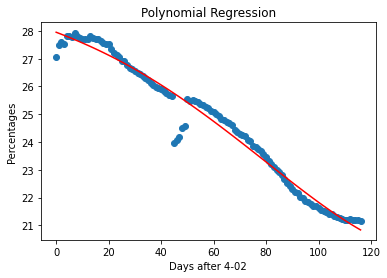

In [49]:
def predict(age_range, num_days):
    x = age_percent.iloc[:, 0:1].values 
    y = age_percent.iloc[:, age_range:age_range+1].values 
    
    # Fitting Linear Regression to the dataset 
    from sklearn.linear_model import LinearRegression 
    lin = LinearRegression() 

    lin.fit(x, y) 
    # Fitting Polynomial Regression to the dataset 
    from sklearn.preprocessing import PolynomialFeatures 

    poly = PolynomialFeatures(degree = 4) 
    x_poly = poly.fit_transform(x) 

    poly.fit(x_poly, y) 
    lin2 = LinearRegression() 
    lin2.fit(x_poly, y) 
    #Visualising the Polynomial Regression results 
    plt.scatter(x, y) 

    plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red') 
    plt.title('Polynomial Regression') 
    plt.xlabel('Days after 4-02') 
    plt.ylabel('Percentages') 

    #plt.show() 
    return lin2.predict(poly.fit_transform([[num_days]]))[0][0]
    
    

predict(3, 1)

In [50]:
age_percent.columns

Index(['days after 4-02', '0-17', '18-49', '50-64', '65+'], dtype='object')

,days after 4-02,0-17,18-49,50-64,65+
0,117,0.066973,67.186976,20.783728,11.981112
1,118,0.075664,67.284497,20.731513,11.926006
2,119,0.085302,67.374557,20.680611,11.876184
3,120,0.095932,67.456928,20.631066,11.831789
4,121,0.107600,67.531379,20.582923,11.792971
5,122,0.120355,67.597680,20.536226,11.759875
6,123,0.134244,67.655594,20.491020,11.732651
7,124,0.149316,67.704886,20.447351,11.711449
8,125,0.165624,67.745318,20.405265,11.696418
9,126,0.183216,67.776647,20.364809,11.687710


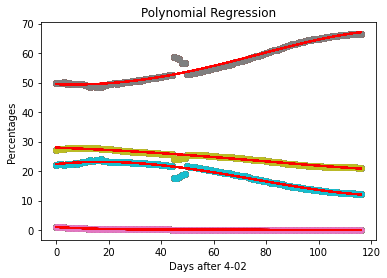

In [51]:
age_percent_predict = {}
for i in list(age_percent.columns):
    age_percent_predict[i] = []

for i in range(len(age_percent['18-49']), len(age_percent['18-49'])+60):
    age_percent_predict['days after 4-02'].append(i)
    age_percent_predict['0-17'].append(predict(1, i))
    age_percent_predict['18-49'].append(predict(2,i))
    age_percent_predict['50-64'].append(predict(3,i))
    age_percent_predict['65+'].append(predict(4,i))
        
age_percent_predict_df = pd.DataFrame(data = age_percent_predict)
age_percent_predict_df

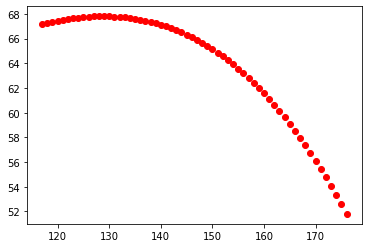

In [52]:
columns = list(age_percent_predict_df.columns)
x2 = age_percent_predict_df[columns[0]]
y2 = age_percent_predict_df[columns[2]]
plt.scatter(x2, y2, color = 'red') 

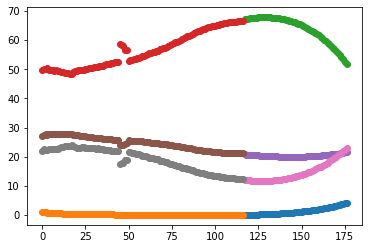

In [53]:
#plt.scatter(x, y, color = 'blue') 
#plt.scatter(x2, y2, color = 'green') 
for i in columns[1:]:
    plt.scatter(age_percent_predict_df[columns[0]], age_percent_predict_df[i])
    plt.scatter(age_percent[columns[0]], age_percent[i])